# RV calculation at specific times.

To determine the RV of the planets expected in my atmospheres

In [4]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('/home/jneal/azores/planet/rvs/exonailer/utilities')
from ajplanet import pl_rv_array as rv_curve
    
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/jneal/miniconda3/envs/azores/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [5]:
# Get parameters for star and taget
Red_JD = 2400000

mean_val = 23.710 # +- 0.017
Period = 2073.6   # +3 - 2.9 days
e = 0.741         # +_ 0.04
K1 = 1703.1       #+- 26  ms^-1
Tau = 53851.5      # +- 3 JD    Note: I think this is tau but I am not sure. 
omega = 70.4 * np.pi/180     # +- 0.7 deg


#Target parameters:  Obtained from sahlmann et al.
#                 [mean_val, K1, omega, e, Tau, Period]
HD30501_params = [23.710, 1703.1, 70.4, 0.741, 53851.5, 2073.6]  # sahlman
HD162020_params = []
HD202206_params = []   
HD211847_params = [6.689, 291.4,159.2, 0.685, 62030.1, 7929.4]  # Best fit solution from sahlmann not complete period coverage
HD4747_params   = [9.904, 703.3, -94.2, 0.723, 62059.11, 11593.2] # Best fit solution from sahlmann not complete period coverage
HD167665_params = [8.003, 609.5, -134.3,0.340, 56987.6, 4451.8]  # sahlman

HD30501_times =  [2456024.505902, 2456140.887153, 2456141.866329, 2456145.904258]  # from data - need to double check with calculated data centers
HD162020_times = []
HD202206_times = []   
HD211847_times = []  
HD4747_times = []
HD167665_times = [] 

params_dict = {"HD30501":HD30501_params, "HD211847":HD211847_params, \
              "HD4747":HD4747_params, "HD167665":HD167665_params, \
               "HD162020":HD162020_params, "HD202206":HD202206_params, }

times_dict = {"HD30501":HD30501_times, "HD162020":HD162020_times, \
              "HD202206":HD202206_times, "HD211847":HD211847_times, \
              "HD4747":HD4747_times, "HD167665":HD167665_times}

def RV_from_params(t, params):
    """ Get RV values with parameter list.
    
    input:
        t -- The time/s at which to calculate the RV value
        params -- a list of values [mean_val, K1, omega, e, Tau, Period]
    
    omega should be given in degrees. This function converts it to radians.
    
    Outputs:
        RVs -- The radial velocity values evaluated at the given times.
    
    """
    params[2] = np.deg2rad(params[2])
    print(params)
    # Note: test that is np.deg2rad is faster than *np.pi /180
    RVs = rv_curve(t, *params) # *unpacks parameters from list
    return RVs

RV_HD30501 = RV_from_params(HD30501_times, HD30501_params)


def analayse_RV_phase(params):
    """Plot RV phase curve use period and T0 to get times from phase."""
    pass

print(HD30501_times)
print(a)

[23.71, 1703.1, 1.2287117934040082, 0.741, 53851.5, 2073.6]
[2456024.505902, 2456140.887153, 2456141.866329, 2456145.904258]


NameError: name 'a' is not defined

In [3]:
# Time we want the observation for
# HD30501 test value


#2012 April  7 00:08:29.9 UT is
#t = 2456024.505902 - Red_JD

#Time = 2012_08_01T09:17:30
#JD 2456140.887153
#t = 2456140.887153 - Red_JD

#2012 August  2 08:47:30.8 UT is
t = 2456141.866329 - Red_JD # JD

#2012 August  6 09:42:07.9 UT
t = 2456145.904258 - Red_JD


print("Reduced JD for this time {0}".format(t))


Reduced JD for this time 56145.904258


In [4]:
# Calculate Mean anomaly:
#Assuming To = Tau

M_anomaly = 2 * np.pi * (t - Tau)/ Period
print("Mean Anomaly = {}".format(M_anomaly))

Mean Anomaly = 6.95224108922


In [5]:
# Calcualte Ecentric Anomaly E:
#Need to iterativaly find a result to this equation M = E - e sin(E)
from lmfit import minimize, Parameters
import lmfit

def anomaly_residual(params, M, e):
    # Minimize this funciton
    E = params["E"].value
    return M - (E + e * np.sin(E))

# Set up parameters 
params = Parameters()
params.add('E', value=M_anomaly)   # add min and max values ?
               
out = minimize(anomaly_residual, params, args=(M_anomaly, e))
                
E_anomaly = out.params["E"].value
print("Eccentric Anomaly = {0}".format(E_anomaly))
#print(lmfit.fit_report(out))

M_test = E_anomaly + e*np.sin(E_anomaly)

print("Mean Anomaly = {0}".format(M_anomaly))
print("Mean Anomaly = {0} from Eccentric Anomaly".format(M_test))

Eccentric Anomaly = 6.67160494097
Mean Anomaly = 6.95224108922
Mean Anomaly = 6.95224108922 from Eccentric Anomaly


In [6]:
# Ecentric anomaly vai newton method.

import scipy
from scipy.optimize import newton 
def newton_anomaly_residual(E, M, e):
    return  E + e * np.sin(E) - M

# this method is faster than lmfit for this task
E_newton = newton(newton_anomaly_residual, M_anomaly, args=(M_anomaly, e))

print("E_newton", E_newton, "E_guess", M_anomaly)


E_newton 6.67160494097 E_guess 6.95224108922


In [7]:
       
%timeit out = minimize(anomaly_residual, params, args=(M_anomaly, e))
%timeit E_newton = newton(newton_anomaly_residual, M_anomaly, args=(M_anomaly, e))


100 loops, best of 3: 6.29 ms per loop
10000 loops, best of 3: 79.1 µs per loop


In [8]:
# Determine true anomaly from Ecentric anomaly
#tan(nu/2) = np.sqrt((1+e)/(1-e))tan (E/2)

true_anomaly = 2 * np.arctan(np.sqrt((1+e)/(1-e)) * np.tan(E_anomaly/2))

print("True anomaly value = {0}".format(true_anomaly))
#nu goes into RV equations

True anomaly value = 0.943155159553


In [9]:
# Now Calculalte the RV

RV = mean_val + K1 *(np.cos(true_anomaly + omega) + e * np.cos(omega))

print("RV value {0} ms^-1 at time {1} JD*".format(round(RV, 2), round(t, 3)))

RV value -516.1 ms^-1 at time 56145.904 JD*


In [10]:
# HD 30501 RV 
#2012 April  7 00:08:29.9 UT is
##RV1 = 275.06 #ms^-1
#Time = 2012_08_01T09:17:30
#JD 2456140.887153
##RV2 = -488.76 # ms^-1

#2012 August  2 08:47:30.8 UT is
##RV3 = -494.14   # ms^-1
#2012 August  6 09:42:07.9 UT
##RV4 = -516.1   # ms^-1

import matplotlib.pyplot as plt

plt.plot(RV1)
plt.plot(RV2)
plt.plot(RV3)
plt.plot(RV4)




In [11]:
from lmfit import minimize, Parameters
import lmfit

In [12]:
def Mean_Anomaly(t, Tau, Period):
    """ Calculate mean Anomaly using period, tau and a time value"""
    return 2 * np.pi * (t - Tau)/ Period
    

def anomaly_residual(params, M, e):
    # Minimize this funciton
    E = params["E"].value
    return M - (E + e * np.sin(E))    


def Radial_velocity(mean_val, K1, true_anomaly, omega, e):
    # Calculate RV of star
    return mean_val + K1 *(np.cos(true_anomaly + omega) + e * np.cos(omega))


In [13]:
def True_Anomaly(E_anomaly, e):
    # Rodrigo suggests using arctan 2 to preserve signs. 
    # and turn into divions of sin and cos to preserve the quater of parameter space your in.
    return 2 * np.arctan(np.sqrt((1+e)/(1-e)) * np.tan(E_anomaly/2))

def True_Anomaly2(E_anomaly, e):
    # Rodrigo suggests using arctan 2 to preserve signs. 
    # and turn into divions of sin and cos to preserve the quater of parameter space your in.
    #return 2 * np.arctan(np.sqrt(1+e)/ np.sqrt(1-e)) * np.sin(E_anomaly/2) / np.cos(E_anomaly/2)
    return 2 * np.arctan(np.sqrt(1+e)/ np.sqrt(1-e) * np.tan(E_anomaly/2))


def True_Anomaly3(E_anomaly, e):
    # Rodrigo suggests using arctan 2 to preserve signs. 
    # and turn into divions of sin and cos to preserve the quater of parameter space your in.
    #return 2 * np.arctan(np.sqrt(1+e)/ np.sqrt(1-e)) * np.sin(E_anomaly/2) / np.cos(E_anomaly/2)
    return 2 * np.arctan2( np.sqrt(1-e) * np.cos(E_anomaly/2), np.sqrt(1+e) * np.sin(E_anomaly/2))

def True_Anomaly4(E_anomaly, e):
    # Rodrigo suggests using arctan 2 to preserve signs. 
    # and turn into divions of sin and cos to preserve the quater of parameter space your in.
    #return 2 * np.arctan(np.sqrt(1+e)/ np.sqrt(1-e)) * np.sin(E_anomaly/2) / np.cos(E_anomaly/2)
    return 2 * np.arctan2( np.sqrt(1+e) * np.sin(E_anomaly/2), np.sqrt(1-e) * np.cos(E_anomaly/2))


In [14]:

times = np.linspace(Tau, Tau+Period, 1000)

M_anomalies = Mean_Anomaly(times, Tau, Period)
E_anomalies = np.empty_like(M_anomalies)
for i, t_i in enumerate(times):
    #params = Parameters()
    #params.add('E', value=M_anomalies[i])   # add min and max values ? 
    #out = minimize(anomaly_residual, params, args=(M_anomalies[i], e))
    #E_anomalies[i] = out.params["E"].value
    E_anomalies[i] = newton(newton_anomaly_residual, M_anomalies[i], args=(M_anomalies[i], e))

print("Done ")

Done 


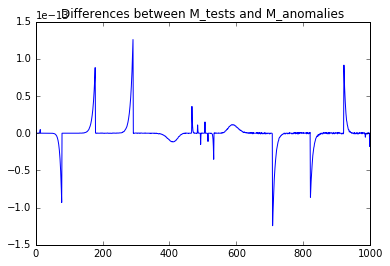

done


In [15]:

#print("Eccentric Anomaly = {0}".format(E_anomalies))
#print(lmfit.fit_report(out))

M_tests = E_anomalies + e*np.sin(E_anomalies)

#print("Mean Anomaly = {0}".format(M_anomalies))
#print("Mean Anomaly = {0} from Eccentric Anomaly".format(M_tests))

#print("Differences {}".format(M_tests-M_anomalies))

plt.plot(M_tests-M_anomalies)
plt.title("Differences between M_tests and M_anomalies")
plt.show()
#print(lmfit.report_fit(out))

T_anomalies = True_Anomaly(E_anomalies, e)
T_anomalies2 = True_Anomaly2(E_anomalies, e)
T_anomalies3 = True_Anomaly3(E_anomalies, e)
T_anomalies4 = True_Anomaly4(E_anomalies, e)
print("done")

In [16]:
#print(T_anomalies)
#print(T_anomalies2)
#print(T_anomalies3)
#plt.plot(times, T_anomalies, label="1")
#plt.plot(times, T_anomalies2, label="2")
#plt.show()

In [17]:
RVs_1 = Radial_velocity(mean_val, K1, T_anomalies, omega, e)
RVs_2 = Radial_velocity(mean_val, K1, T_anomalies2, omega, e)
RVs_3 = Radial_velocity(mean_val, K1, T_anomalies3, omega, e)
RVs_4 = Radial_velocity(mean_val, K1, T_anomalies4, omega, e)
   

In [18]:
# Test ajplanet comparision

#mean_val, K1, T_anomalies4, omega, e
#ajplanet_rvs = rv_curve(t, gamma,K,omega,ecc,to,P)
ajplanet_rvs = rv_curve(times, mean_val, K1, omega, e, Tau, Period)

print(rv_curve(HD30501_times, mean_val, K1, omega, e, Tau, Period))

[-223.17768364  -98.56138717  -97.5000067   -93.11986697]


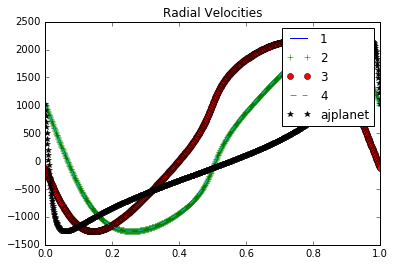

In [19]:
plt.plot((times-Tau) / Period, RVs_1, label="1")
plt.plot((times-Tau) / Period, RVs_2,'+', label="2")
plt.plot((times-Tau) / Period, RVs_3, 'o', label="3")
plt.plot((times-Tau) / Period, RVs_4, "--", label="4")
plt.plot((times-Tau) / Period, ajplanet_rvs, "k*", label="ajplanet")
plt.title("Radial Velocities")
plt.legend()
plt.show()

In [20]:
#plt.plot(T_anomalies, RVs_1)
#plt.plot(T_anomalies2, RVs_2)
#plt.show()

In [21]:

# My Values are not good atm when compaing to rvcurve. 

In [ ]:
# Try thre true anomaly given by the lecuture on facebook.